# Semester 1 Project Submission



## Elliot

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Ian

In [2]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
%matplotlib inline

### Items to be Resolved:
- check for nulls in the sql database tables being used
    - See following cell for findings.
- resolve found nulls 
    - Rows where null can be excluded. This is due to size and number of entries in dataset tables.
- experiment with joins to get tables wanted
    - Joined movie_basics with movie_ratings. Tried further joins but they get very large, very quickly (even using inner joins).
- export joined tables to dataframe
    - Done.
- determine how to best use data for analysis
    - In progress.
____________

- persons % bunch of null values in birth_year, death_year, and in primary_profession
- writers % NONE ARE NULL
- directors % NONE ARE NULL
- known_for % NONE ARE NULL
- principals % NO NULLS IN CATEGORY
- movie_basics % missing data in genres, runtime_minutes
- movie_ratings % NONE ARE NULL
- movie_akas % NO TITLES ARE NULL

In [3]:
# creating connection to database
conn = sql.connect("databases/im.db")

In [4]:
# movie basics query stage 1
q = """
SELECT
    *
FROM
    movie_basics
/*where statement below reduces dataset from 146144 rows to 112233*/
WHERE
    runtime_minutes IS NOT NULL AND genres IS NOT NULL
;"""
pd.read_sql(q, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
112228,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
112229,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
112230,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112231,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [5]:
# test to see how many values of each genre there are
q = """
SELECT
    *
FROM
    movie_basics
/*where statement below reduces dataset from 146144 rows to 112233*/
WHERE
    runtime_minutes IS NOT NULL AND genres IS NOT NULL
;"""
test2_df = pd.read_sql(q, conn)
test2_df.value_counts('genres')

genres
Documentary                   24672
Drama                         15725
Comedy                         6413
Comedy,Drama                   3163
Horror                         2975
                              ...  
Documentary,Fantasy,Sci-Fi        1
History,News,War                  1
Adventure,Animation,Crime         1
Drama,Mystery,Sport               1
Adventure,History,Music           1
Length: 1040, dtype: int64

In [6]:
# movie ratings query stage 1
q = """
SELECT
    *
FROM
    movie_ratings
/*where statement below reduces dataset from 73856 rows to 73856 NO NULLS*/
WHERE
    averagerating IS NOT NULL AND numvotes IS NOT NULL
;"""
pd.read_sql(q, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
# movie_akas query stage 1
q = """
SELECT
    *
FROM
    movie_akas
/*where statement below reduces dataset from 331703 rows to 331703 NO NULLS*/
WHERE
    title IS NOT NULL
;"""
pd.read_sql(q, conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [8]:
# persons table query stage 1
q = """
SELECT
    *
FROM
    persons
WHERE
    primary_profession IS NULL
;"""
pd.read_sql(q, conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0120366,Ralph Bunche,1904.0,1971.0,None
1,nm0256636,Emperor Franz Josef,1830.0,1916.0,None
2,nm0278661,Renee Firestone,NaN,NaN,None
3,nm0441808,Mike Katz,1944.0,NaN,None
4,nm0688002,Norman Podhoretz,1930.0,NaN,None
...,...,...,...,...,...
51335,nm9964778,Brian Espitia,NaN,NaN,None
51336,nm9967439,Jade Doucette,NaN,NaN,None
51337,nm9969939,Anna Bligh,NaN,NaN,None
51338,nm9976388,Naomie Monplaisir,NaN,NaN,None


In [9]:
# principals exploration query
q = """
SELECT
    *
FROM
    principals
;"""
pd.read_sql(q, conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [10]:
# principals category query
q = """
SELECT
    movie_id, person_id, category
FROM
    principals
;"""
test1_df = pd.read_sql(q, conn)
test1_df.value_counts('category')

category
actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
dtype: int64

In [11]:
# directors exploration query
q = """
SELECT
    *
FROM
    directors
;"""
pd.read_sql(q, conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [12]:
# known_for exploration query
q = """
SELECT
    *
FROM
    known_for
;"""
pd.read_sql(q, conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


______________________________

### Consolidation Queries
- Tentative Scale:
    - 6 = good, 7 = great, 8 = wonderful, 9 = nearly perfect, 10 = masterpiece

In [13]:
# combining movie basics and movie ratings
q = """
SELECT
    mb.primary_title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(AverageRating AS float) > 6
    AND CAST(Num_Votes AS int) > 30
    AND mb.runtime_minutes IS NOT NULL
ORDER BY
    mr.averagerating DESC
;"""
pd.read_sql(q, conn)
# added in a filter that would filter out rows that have less than 30 votes

,primary_title,runtime_minutes,genres,AverageRating,Num_Votes
0,Gini Helida Kathe,138.0,Drama,9.9,417
1,RISE: The Story of Augustines,80.0,"Documentary,Music",9.8,45
2,My Darling Son,61.0,Documentary,9.7,32
3,MANRY AT SEA ~ In the Wake of a Dream,94.0,Documentary,9.7,48
4,DOSED,82.0,Documentary,9.7,72
...,...,...,...,...,...
22824,The Vancouver Asahi,132.0,Drama,6.1,196
22825,Belzebuth,114.0,Horror,6.1,288
22826,The Drug King,139.0,"Action,Crime,Drama",6.1,967
22827,One,148.0,"Drama,Thriller",6.1,175


In [14]:
# combining movie basics and movie ratings
q = """
SELECT
    mb.primary_title, mb.runtime_minutes, mb.genres, mr.averagerating
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(averagerating AS float) == 10
    AND runtime_minutes IS NOT NULL
ORDER BY
    mr.averagerating DESC
;"""
# checking to see titles with a rating of 10.0
# update to above comment: restricting num_votes by 30 (like above) will
test3_df = pd.read_sql(q, conn)
test3_df

,primary_title,runtime_minutes,genres,averagerating
0,Exteriores: Mulheres Brasileiras na Diplomacia,52.0,Documentary,10.0
1,The Dark Knight: The Ballad of the N Word,129.0,"Comedy,Drama",10.0
2,Freeing Bernie Baran,100.0,"Crime,Documentary",10.0
3,Hercule contre Hermès,72.0,Documentary,10.0
4,I Was Born Yesterday!,31.0,Documentary,10.0
5,Revolution Food,70.0,Documentary,10.0
6,Fly High: Story of the Disc Dog,65.0,Documentary,10.0
7,The Paternal Bond: Barbary Macaques,59.0,Documentary,10.0
8,Requiem voor een Boom,48.0,Documentary,10.0
9,A Dedicated Life: Phoebe Brand Beyond the Group,93.0,Documentary,10.0


In [15]:
# persons to principals to movie table NO FILTERS
q = """
SELECT 
    pe.person_id
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
GROUP BY
    pe.primary_name
ORDER BY
    Num_of_Appearances DESC
LIMIT 10
;"""
pd.read_sql(q, conn)

,person_id,primary_name,AverageRating,Num_of_Appearances
0,nm1930572,Kevin MacLeod,6.337427,171
1,nm0000616,Eric Roberts,4.823770,122
2,nm0000636,William Shakespeare,7.116364,110
3,nm2065631,Gopi Sundar,5.929897,97
4,nm0215842,Vicente G. del Rosario III,6.278481,79
5,nm3888981,S. Thaman,5.615789,76
6,nm0695177,Prakash Raj,5.983784,74
7,nm0103977,Brahmanandam,5.650000,74
8,nm0215861,Veronique del Rosario-Corpus,6.246575,73
9,nm0089658,Jason Blum,5.839437,71


In [16]:
# finding the average ratings per film and num of appearances for writers
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category = 'writer'
    
GROUP BY
    pe.primary_name
ORDER BY
    Num_of_Appearances DESC
;"""
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm0000636,writer,William Shakespeare,7.116364,110
1,nm0893128,writer,Kona Venkat,5.943750,32
2,nm0598531,writer,Mark Monroe,7.380645,31
3,nm3057599,writer,Dheeraj Rattan,6.403333,30
4,nm3015321,writer,Alim Sudio,6.356667,30
...,...,...,...,...,...
36703,nm7958873,writer,A. García de Quirós,8.900000,1
36704,nm7756072,writer,A Type Machine,4.500000,1
36705,nm3211397,writer,A Shawn Austin,8.800000,1
36706,nm7817712,writer,'Om' Rakesh Chaturvedi,5.600000,1


In [17]:
# finding the average ratings per film and num of appearances for directors
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category = 'director'
    
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 1
ORDER BY
    Num_of_Appearances DESC
;"""
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm2551464,director,Nayato Fio Nuala,4.713514,37
1,nm0213983,director,David DeCoteau,3.400000,27
2,nm4341114,director,Dustin Ferguson,3.788462,26
3,nm3583561,director,Larry Rosen,7.184000,25
4,nm0559285,director,Rizal Mantovani,5.842857,21
...,...,...,...,...,...
13686,nm5374119,director,A.M.R. Ramesh,6.700000,2
13687,nm3527772,director,A.M. Greene,6.700000,2
13688,nm5989634,director,A.K. Strom,4.300000,2
13689,nm2270935,director,A.J. Edwards,6.350000,2


In [18]:
# finding the average ratings per film and num of appearances for lead actor/actress
# lead actor/actress is found by filtering on principals' column called ordering for the 1st actor
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category IN ('actor', 'actress')
    AND CAST(AverageRating AS float) >= 6
    AND CAST(pr.ordering AS int) == 1
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 2
ORDER BY
    Num_of_Appearances DESC
;"""
# filtering for only actor/actresses who had an average rating of 6 or greater
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm5954636,actor,Sergey A.,7.550000,30
1,nm1335387,actor,Prithviraj Sukumaran,7.025000,24
2,nm0000616,actor,Eric Roberts,7.230000,20
3,nm3534300,actor,Babusan,7.015789,19
4,nm4043111,actor,Vijay Sethupathi,7.594444,18
...,...,...,...,...,...
1680,nm6012803,actor,Abed Abest,6.733333,3
1681,nm0180411,actress,Abbie Cornish,6.300000,3
1682,nm4742249,actor,Aaryan Sigdel,7.033333,3
1683,nm0669853,actor,Aaron Pedersen,6.533333,3


In [19]:
# finding the average ratings per film and num of appearances for actor/actress
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category IN ('actor', 'actress')
    AND CAST(AverageRating AS float) >= 6
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 2
ORDER BY
    Num_of_Appearances DESC
;"""
# filtering for only actor/actresses who had an average rating of 6 or greater
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm0695177,actor,Prakash Raj,6.961905,42
1,nm5954636,actor,Sergey A.,7.458824,34
2,nm1384413,actor,Saswata Chatterjee,6.897059,34
3,nm2794335,actor,Sadhu Kokila,6.878125,32
4,nm0000616,actor,Eric Roberts,7.050000,32
...,...,...,...,...,...
8955,nm3810208,actor,Aarif Rahman,7.100000,3
8956,nm5615313,actor,Aari,6.733333,3
8957,nm3933547,actress,Aahana Kumra,6.466667,3
8958,nm4462167,actor,AJ Muhlach,7.433333,3


In [20]:
# finding the average ratings per film and num of appearances for producer
# hard to quantify where to limit here regarding appearances -- producers often only produce once, apparently
q = """
SELECT 
    pe.person_id
    ,pr.category
    ,pe.primary_name
    ,AVG(mr.averagerating) AS AverageRating
    ,COUNT(mb.primary_title) AS Num_of_Appearances
FROM
    persons AS pe
    JOIN principals AS pr
        USING(person_id)
    JOIN movie_basics AS mb
        USING(movie_id)
    JOIN movie_ratings as mr
        USING(movie_id)
WHERE
    pr.category = 'producer'
    AND CAST(AverageRating AS float) >= 6
GROUP BY
    pe.primary_name
HAVING
    CAST(Num_of_Appearances AS int) > 1
ORDER BY
    AverageRating DESC
;"""
pd.read_sql(q, conn)

,person_id,category,primary_name,AverageRating,Num_of_Appearances
0,nm7574932,producer,Stephanie Benamra,9.80,2
1,nm5641779,producer,Marvin Glover,9.30,2
2,nm1979830,producer,Marija Kosor,9.25,4
3,nm4813335,producer,Igor Jelinovic,9.25,2
4,nm4099687,producer,Tyler Marino,9.20,2
...,...,...,...,...,...
7727,nm2994729,producer,Didier Costet,6.00,2
7728,nm3450764,producer,David Mimran,6.00,3
7729,nm2820211,producer,Christophe Barral,6.00,2
7730,nm2208460,producer,Atsushi Moriyama,6.00,3


________________________
### Visualization for Reviews and Genres

In [21]:
# reading SQL query for movie reviews into dataframe - run 1
q = """
SELECT
    mb.movie_id
    ,mb.primary_title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_mr1 = pd.read_sql(q, conn)
df_mr1

,movie_id,primary_title,runtime_minutes,genres,AverageRating,Num_Votes
0,tt2659636,Modern Times Forever,14400.0,Documentary,6.2,69
1,tt2008009,The Clock,1440.0,Drama,8.9,219
2,tt9047474,La flor,808.0,"Drama,Fantasy,Musical",8.5,100
3,tt7528992,Europa: The Last Battle,746.0,Documentary,8.2,162
4,tt2261469,Double Fine Adventure,724.0,Documentary,8.5,59
...,...,...,...,...,...,...
41002,tt6191254,We Are Not Alone,12.0,Documentary,4.9,113
41003,tt2330698,The Birdman,11.0,"Biography,Documentary,Music",5.9,62
41004,tt3263874,First to Fall,10.0,"Action,Adventure,Documentary",7.7,36
41005,tt5172042,The Asylum,10.0,Documentary,4.3,49


In [22]:
# getting population dataset statistics - run 1
df_mr1.describe()

,runtime_minutes,AverageRating,Num_Votes
count,41007.00000,41007.000000,4.100700e+04
mean,98.56088,6.052869,6.329785e+03
std,74.47162,1.381648,4.043751e+04
min,8.00000,1.000000,3.100000e+01
25%,86.00000,5.300000,7.500000e+01
50%,94.00000,6.200000,2.200000e+02
75%,107.00000,7.000000,8.750000e+02
max,14400.00000,9.900000,1.841066e+06


In [23]:
# reading SQL query for movie reviews into dataframe - run 2

# added WHERE clause to remove movies from dataframe if longer than 3.5 hours - took away 65 values from dataset
# and reduced runtime mean, std dev.!
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_mr1 = pd.read_sql(q, conn)
df_mr1

,movie_id,title,runtime_minutes,genres,AverageRating,Num_Votes
0,tt5536316,National Theatre Live: Les Liaisons Dangereuses,210.0,Romance,8.3,68
1,tt1113829,George Harrison: Living in the Material World,208.0,"Biography,Documentary,Music",8.2,9372
2,tt4937126,It All Started at the End,208.0,Documentary,7.9,186
3,tt6846134,National Theatre Live: Amadeus,206.0,Musical,8.3,66
4,tt6244196,Elvis Presley: The Searcher,205.0,Documentary,7.7,902
...,...,...,...,...,...,...
40930,tt6191254,We Are Not Alone,12.0,Documentary,4.9,113
40931,tt2330698,The Birdman,11.0,"Biography,Documentary,Music",5.9,62
40932,tt3263874,First to Fall,10.0,"Action,Adventure,Documentary",7.7,36
40933,tt5172042,The Asylum,10.0,Documentary,4.3,49


In [24]:
# getting population dataset statistics - run 2
df_mr1.describe()
# this will be the data we use to perform z-tests on the selected top 12 genres of interest (see below)

,runtime_minutes,AverageRating,Num_Votes
count,40935.000000,40935.000000,4.093500e+04
mean,97.830292,6.050309,6.337624e+03
std,20.412743,1.380265,4.047107e+04
min,8.000000,1.000000,3.100000e+01
25%,86.000000,5.300000,7.500000e+01
50%,94.000000,6.200000,2.200000e+02
75%,107.000000,7.000000,8.760000e+02
max,210.000000,9.900000,1.841066e+06


### Preparing Data for Visualization
- Below, we are determining which genres will remain in the data for vizualization purposes

In [25]:
# getting information about top 12 genres to determine value where necessary to cut off genres below
df_mr1.value_counts('genres').nlargest(12)

genres
Drama                   6200
Documentary             3518
Comedy                  3131
Comedy,Drama            1820
Horror                  1392
Drama,Romance           1059
Comedy,Romance           927
Comedy,Drama,Romance     862
Thriller                 834
Horror,Thriller          749
Drama,Thriller           678
Action                   433
dtype: int64

In [26]:
# filtered SQL Query, then read into the specialized visualization dataframe
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama'
                        ,'Documentary'
                        ,'Comedy'
                        ,'Comedy,Drama'
                        ,'Horror'
                        ,'Drama,Romance'
                        ,'Comedy,Romance'
                        ,'Comedy,Drama,Romance'
                        ,'Thriller'
                        ,'Horror,Thriller'
                        ,'Drama,Thriller'
                        ,'Action')
ORDER BY
    mb.runtime_minutes DESC
;"""
df_viz1 = pd.read_sql(q, conn)
df_viz1

,movie_id,title,runtime_minutes,genres,AverageRating,Num_Votes
0,tt4937126,It All Started at the End,208.0,Documentary,7.9,186
1,tt6244196,Elvis Presley: The Searcher,205.0,Documentary,7.7,902
2,tt5226764,Cry of Fear,203.0,Horror,7.3,43
3,tt6845890,National Theatre Live: Twelfth Night,203.0,Comedy,8.1,38
4,tt5652594,My Journey Through French Cinema,201.0,Documentary,7.6,458
...,...,...,...,...,...,...
21598,tt6151732,116 Cameras,16.0,Documentary,7.4,54
21599,tt4742130,Behind Closed Doors,12.0,Documentary,6.2,32
21600,tt6191254,We Are Not Alone,12.0,Documentary,4.9,113
21601,tt5172042,The Asylum,10.0,Documentary,4.3,49


### ABOVE, CUTTING OFF EVERY GENRE BELOW THAT HAS LESS FILMS THAN ACTION
### BELOW, NEED TO RETHINK VISUALIZATION FOR THIS

In [27]:
# REWORK AFTER CLEANING DATA SET OF EXTRA GENRES
# inserting genre values below


values = [drama_rating,documentary_rating,comedy_rating,comdram_rating,horror_rating,
         dramrom_rating,romcom_rating,dramromcom_rating,thr_rating,horthr_rating,dramthr_rating,act_rating] 

# means came from below work to do z-tests

top_12_genres = ['Drama','Documentary','Comedy','Comedy,Drama','Horror','Drama,Romance','Comedy,Romance',
                 'Comedy,Drama,Romance','Thriller','Horror,Thriller','Drama,Thriller','Action'] 

# corresponds to genre ratings in values list

fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(values, 10, tick_label=top_12_genres)

ax.set_title("Average Rating by Genre")
ax.set_ylabel("Average Rating")
ax.set_xlabel("Genres");

NameError: name 'drama_rating' is not defined

### Visualization Checklist
- one graph for single genre films
- one graph for more-than-one-genre films (after exclusion for single entries)
- one graph for more-than-one-genre films AND single genre films

### z-test Checklist 
- test each genre for relevance
    - set up separation of genres from data source, will do once then should be able to copy format for each genre being excluded and tested on
    - population mean and std dev will be mean of overall data found above, sample mean will be that of the genre tested on

In [64]:
df_viz1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21603 entries, 0 to 21602
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         21603 non-null  object 
 1   title            21603 non-null  object 
 2   runtime_minutes  21603 non-null  float64
 3   genres           21603 non-null  object 
 4   AverageRating    21603 non-null  float64
 5   Num_Votes        21603 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 1012.8+ KB


### FINDING MEANS OF AVERAGE RATINGS FOR EACH TOP 12 GENRE
#### Below, I am pulling a query and creating a dataframe for each of the genres to pull their df.mean() for z-testing.

In [65]:
# Drama mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama')
ORDER BY
    mb.runtime_minutes DESC
;"""
drama_df = pd.read_sql(q, conn)
drama_rating = drama_df['AverageRating'].mean()
print(drama_rating)

6.377516129032258


In [66]:
# Documentary mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Documentary')
ORDER BY
    mb.runtime_minutes DESC
;"""
documentary_df = pd.read_sql(q, conn)
documentary_rating = documentary_df['AverageRating'].mean()
print(documentary_rating)

7.136384309266629


In [67]:
# Comedy mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy')
ORDER BY
    mb.runtime_minutes DESC
;"""
comedy_df = pd.read_sql(q, conn)
comedy_rating = comedy_df['AverageRating'].mean()
print(comedy_rating)

5.52258064516129


In [68]:
# Comedy,Drama mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy,Drama')
ORDER BY
    mb.runtime_minutes DESC
;"""
comdram_df = pd.read_sql(q, conn)
comdram_rating = comdram_df['AverageRating'].mean()
print(comdram_rating)

6.219010989010989


In [69]:
# horror mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Horror')
ORDER BY
    mb.runtime_minutes DESC
;"""
horror_df = pd.read_sql(q, conn)
horror_rating = horror_df['AverageRating'].mean()
print(horror_rating)

4.413002873563218


In [70]:
# Drama,Romance Romance mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama,Romance')
ORDER BY
    mb.runtime_minutes DESC
;"""
dramrom_df = pd.read_sql(q, conn)
dramrom_rating = dramrom_df['AverageRating'].mean()
print(dramrom_rating)

6.204249291784702


In [71]:
# Comedy,Romance mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy,Romance')
ORDER BY
    mb.runtime_minutes DESC
;"""
romcom_df = pd.read_sql(q, conn)
romcom_rating = romcom_df['AverageRating'].mean()
print(romcom_rating)

5.755231930960087


In [72]:
# Comedy,Drama,Romance mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Comedy,Drama,Romance')
ORDER BY
    mb.runtime_minutes DESC
;"""
dramromcom_df = pd.read_sql(q, conn)
dramromcom_rating = dramromcom_df['AverageRating'].mean()
print(dramromcom_rating)

6.169489559164733


In [73]:
# Thriller mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Thriller')
ORDER BY
    mb.runtime_minutes DESC
;"""
thr_df = pd.read_sql(q, conn)
thr_rating = thr_df['AverageRating'].mean()
print(thr_rating)

5.357194244604316


In [74]:
# Horror,Thriller mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Horror,Thriller')
ORDER BY
    mb.runtime_minutes DESC
;"""
horthr_df = pd.read_sql(q, conn)
horthr_rating = horthr_df['AverageRating'].mean()
print(horthr_rating)

4.606275033377837


In [75]:
# Drama,Thriller mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Drama,Thriller')
ORDER BY
    mb.runtime_minutes DESC
;"""
dramthr_df = pd.read_sql(q, conn)
dramthr_rating = dramthr_df['AverageRating'].mean()
print(dramthr_rating)

5.907817109144543


In [76]:
# Action mean
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
    AND mb.genres IN ('Action')
ORDER BY
    mb.runtime_minutes DESC
;"""
act_df = pd.read_sql(q, conn)
act_rating = act_df['AverageRating'].mean()
print(act_rating)

5.31108545034642


### Ho:
##### - There is no difference between a respective top 12 genre's ratings and all other genres. 

### Ha:
##### - There is a difference between a respective top 12 genre's ratings and all other genres at the 95% level. 

In [77]:
df_mr1.describe()

,Runtime,AverageRating,Num_Votes
count,40935.000000,40935.000000,4.093500e+04
mean,97.830292,6.050309,6.337624e+03
std,20.412743,1.380265,4.047107e+04
min,8.000000,1.000000,3.100000e+01
25%,86.000000,5.300000,7.500000e+01
50%,94.000000,6.200000,2.200000e+02
75%,107.000000,7.000000,8.760000e+02
max,210.000000,9.900000,1.841066e+06


In [78]:
df_viz1.value_counts('genres')

genres
Drama                   6200
Documentary             3518
Comedy                  3131
Comedy,Drama            1820
Horror                  1392
Drama,Romance           1059
Comedy,Romance           927
Comedy,Drama,Romance     862
Thriller                 834
Horror,Thriller          749
Drama,Thriller           678
Action                   433
dtype: int64

In [79]:
# z-test - Drama run

x_bar = drama_rating
n = 6200
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Reject the null


In [80]:
# z-test - Documentary run

x_bar = documentary_rating
n = 3518
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Reject the null


In [81]:
# z-test - Comedy run

x_bar = comedy_rating
n = 3131
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


In [82]:
# z-test - Comdedy,Drama run (Dramedy)

x_bar = comdram_rating
n = 1820
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Reject the null


In [83]:
# z-test - Horror run

x_bar = horror_rating
n = 1392
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


In [84]:
# z-test - Drama,Romance run

x_bar = dramrom_rating
n = 1059
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Reject the null


In [85]:
# z-test - Comedy,Romance run (Romantic Comedy)

x_bar = romcom_rating
n = 927
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


In [86]:
# z-test - Comedy,Drama,Romance run

x_bar = dramromcom_rating
n = 862
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Reject the null


In [87]:
# z-test - Thriller run

x_bar = thr_rating
n = 834
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


In [88]:
# z-test - Horror,Thriller run

x_bar = horthr_rating
n = 749
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


In [89]:
# z-test - Drama,Thriller run

x_bar = dramthr_rating
n = 678
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


In [91]:
# z-test - Action run

x_bar = act_rating
n = 433
std = 1.380265
mu = 6.050309

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1-stats.norm.cdf(z)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


### Testing if Runtime Is Correlated to Average Rating

In [32]:
# added WHERE clause to remove movies from dataframe if longer than 3.5 hours - took away 65 values from dataset
# and reduced runtime mean, std dev.!
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) <= 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_mr1 = pd.read_sql(q, conn)
df_mr1

,movie_id,title,Runtime,genres,AverageRating,Num_Votes
0,tt5536316,National Theatre Live: Les Liaisons Dangereuses,210.0,Romance,8.3,68
1,tt1113829,George Harrison: Living in the Material World,208.0,"Biography,Documentary,Music",8.2,9372
2,tt4937126,It All Started at the End,208.0,Documentary,7.9,186
3,tt6846134,National Theatre Live: Amadeus,206.0,Musical,8.3,66
4,tt6244196,Elvis Presley: The Searcher,205.0,Documentary,7.7,902
...,...,...,...,...,...,...
40930,tt6191254,We Are Not Alone,12.0,Documentary,4.9,113
40931,tt2330698,The Birdman,11.0,"Biography,Documentary,Music",5.9,62
40932,tt3263874,First to Fall,10.0,"Action,Adventure,Documentary",7.7,36
40933,tt5172042,The Asylum,10.0,Documentary,4.3,49


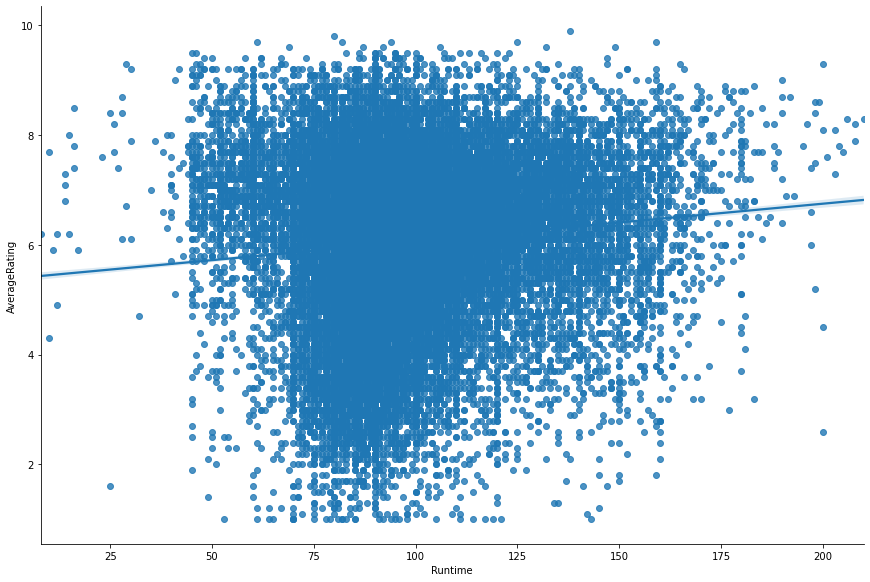

In [34]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_mr1, height=8, aspect=1.5);

### Ho:
##### - There is no correlation between runtime and average rating. 

### Ha:
##### - There is a correlation between runtime and average rating at the 95% level. 

In [59]:
# calculating correlation

x = df_mr1['Runtime']
y = df_mr1['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient -- seems we do have a positive correlation!
r

0.10138858194769919

In [57]:
# reference for fisher transformation formula to convert: 
# https://www.statology.org/fisher-z-transformation/#:~:text=For%20example%2C%20if%20the%20Pearson,(1%2Dr))%20%2F%202
z_from_r = (np.log((1+r) / (1-r)) / 2)
z_from_r

0.10173815343775622

In [58]:
# is this statistically significant?
p = 1-stats.norm.cdf(z_from_r)

if p < 0.05:
    print("Reject the null")
elif p >= 0.05:
    print("Fail to reject null")

Fail to reject null


- break down runtime into buckets of time periods

## Frida

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Enrique

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## John

In [ ]:
# Your code here - remember to use markdown cells for comments as well!